### 머신러닝을 위한 전처리
1. 학습을 위한 새로운 컬럼들을 생성한다.
2. 결측치와 이상치에 대해 처리한다.
3. 문자열 데이터를 숫자로 변환(학습 전)
4. 데이터 표준화(학습 전)

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터를 불러온다.

In [2]:
train_df = pd.read_csv('data/spaceship_train3.csv')
test_df = pd.read_csv('data/spaceship_test3.csv')

all_df = pd.concat([train_df, test_df])
all_df.reset_index(inplace=True, drop=True)
all_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinNumber,CabinSide,FirstName,LastName,Ages,RoomServiceGrade
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,1,1,B,0.0,P,Ofracculy,Maham,30.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1.0,2,1,F,0.0,S,Vines,Juanna,20.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,3,1,A,0.0,S,Susent,Altark,50.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,3,2,A,0.0,S,Susent,Solam,30.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1.0,4,1,F,1.0,S,Santantines,Willy,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,NaN,9266,2,G,1496.0,S,Peter,Jeron,30.0,0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,NaN,9269,1,NaN,NaN,NaN,Scheron,Matty,40.0,0
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,...,NaN,9271,1,D,296.0,P,Pore,Jayrin,NaN,0
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,...,NaN,9273,1,D,297.0,P,Conale,Kitakan,NaN,0


### 컬럼 생성

In [3]:
# GroupNumberCount
# GroupNumberCount 컬럼을 추가한다.
all_df['GroupNumberCount'] = 0

# GroupNumber의 도수를 구한다.
a1 = all_df['GroupNumber'].value_counts()
# 도수의 종류
a2 = a1.value_counts().index

# 도수의 수를 통해 반복한다.
for a3 in a2 :
    # GroupNumber의 도수가 a3와 같은 것을 가져온다.
    a4 = a1[a1 == a3]
    # a4의 index를 가져온다(GroupNumber값)
    a5 = a4.index
    # index에 해당하는 행에 a3을 넣어준다.
    a6 = all_df.query('GroupNumber in @a5').index
    all_df.loc[a6, 'GroupNumberCount'] = a3

all_df['GroupNumberCount'].value_counts()

GroupNumberCount
1    7145
2    2590
3    1506
4     616
5     380
7     329
6     252
8     152
Name: count, dtype: int64

In [4]:
# NumberInGroupCount
# NumberInGroupCount 컬럼을 추가한다.
all_df['NumberInGroupCount'] = 0

# NumberInGroup의 도수를 구한다.
a1 = all_df['NumberInGroup'].value_counts()
# 도수의 종류
a2 = a1.value_counts().index

# 도수의 수를 통해 반복한다.
for a3 in a2 :
    # NumberInGroup의 도수가 a3와 같은 것을 가져온다.
    a4 = a1[a1 == a3]
    # a4의 index를 가져온다(NumberInGroup값)
    a5 = a4.index
    # index에 해당하는 행에 a3을 넣어준다.
    a6 = all_df.query('NumberInGroup in @a5').index
    all_df.loc[a6, 'NumberInGroupCount'] = a3

all_df['NumberInGroupCount'].value_counts()

NumberInGroupCount
9280    9280
2135    2135
840      840
338      338
184      184
108      108
66        66
19        19
Name: count, dtype: int64

In [5]:
# FirstNameCount
# FirstNameCount 컬럼을 추가한다.
all_df['FirstNameCount'] = 0

# FirstName의 도수를 구한다.
a1 = all_df['FirstName'].value_counts()
# 도수의 종류
a2 = a1.value_counts().index

# 도수의 수를 통해 반복한다.
for a3 in a2 :
    # NumberInGroup의 도수가 a3와 같은 것을 가져온다.
    a4 = a1[a1 == a3]
    # a4의 index를 가져온다(FirstName 개수 값)
    a5 = a4.index
    # index에 해당하는 행에 a3을 넣어준다.
    a6 = all_df.query('FirstName in @a5').index
    all_df.loc[a6, 'FirstNameCount'] = a3

all_df['FirstNameCount'].value_counts()

FirstNameCount
7     1505
6     1452
5     1440
4     1204
9     1170
8     1128
3      912
10     880
2      642
11     627
12     516
14     322
0      294
13     234
1      208
15     165
16     128
18      54
17      51
19      38
Name: count, dtype: int64

In [6]:
# LastNameCount
# LastNameCount 컬럼을 추가한다.
all_df['LastNameCount'] = 0

# LastName의 도수를 구한다.
a1 = all_df['LastName'].value_counts()
# 도수의 종류
a2 = a1.value_counts().index

# 도수의 수를 통해 반복한다.
for a3 in a2 :
    # NumberInGroup의 도수가 a3와 같은 것을 가져온다.
    a4 = a1[a1 == a3]
    # a4의 index를 가져온다(LastName 개수 값)
    a5 = a4.index
    # index에 해당하는 행에 a3을 넣어준다.
    a6 = all_df.query('LastName in @a5').index
    all_df.loc[a6, 'LastNameCount'] = a3

all_df['LastNameCount'].value_counts()

LastNameCount
4     1700
5     1650
3     1470
6     1464
7     1260
9     1170
8     1088
2      926
10     650
11     495
1      339
0      294
12     192
13     169
14      56
16      32
15      15
Name: count, dtype: int64

### 컬럼 제거
- PassengerId, Cabin, Name, CabinNumber, Ages, RoomServiceGrade

In [7]:
all_df.drop(['PassengerId', 'Cabin', 'Name', 'CabinNumber', 'Ages', 'RoomServiceGrade'], axis=1, inplace=True)
all_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,GroupNumber,NumberInGroup,CabinDeck,CabinSide,FirstName,LastName,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,1,B,P,Ofracculy,Maham,1,9280,3,5
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,2,1,F,S,Vines,Juanna,1,9280,4,6
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,3,1,A,S,Susent,Altark,2,9280,7,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,3,2,A,S,Susent,Solam,2,2135,7,5
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,4,1,F,S,Santantines,Willy,1,9280,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,...,9266,2,G,S,Peter,Jeron,2,2135,10,6
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,...,9269,1,NaN,NaN,Scheron,Matty,1,9280,6,5
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,...,9271,1,D,P,Pore,Jayrin,1,9280,4,6
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,...,9273,1,D,P,Conale,Kitakan,1,9280,7,3


### 결측치

In [8]:
# 결측치 확인
all_df.drop('Transported', axis=1).isna().sum()

HomePlanet            288
CryoSleep             310
Destination           274
Age                   270
VIP                   296
RoomService           263
FoodCourt             289
ShoppingMall          306
Spa                   284
VRDeck                268
GroupNumber             0
NumberInGroup           0
CabinDeck             299
CabinSide             299
FirstName             294
LastName              294
GroupNumberCount        0
NumberInGroupCount      0
FirstNameCount          0
LastNameCount           0
dtype: int64

In [9]:
# HomePlanet 의 도수 확인
all_df['HomePlanet'].value_counts()

HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: count, dtype: int64

In [10]:
# 결측치 개수 확인
all_df['HomePlanet'].isna().sum()

288

In [11]:
# Earth가 압도적으로 많기 때문에 Earth에 포함시킨다.
idx = all_df.query('HomePlanet.isna()').index
all_df.loc[idx, 'HomePlanet'] = 'Earth'
all_df['HomePlanet'].isna().sum()

0

In [12]:
all_df['HomePlanet'].value_counts()

HomePlanet
Earth     7153
Europa    3133
Mars      2684
Name: count, dtype: int64

In [13]:
# CryoSleep 의 도수 확인
all_df['CryoSleep'].value_counts()

CryoSleep
False    8079
True     4581
Name: count, dtype: int64

In [14]:
# 결측치 개수 확인
all_df['CryoSleep'].isna().sum()

310

In [15]:
# False가 압도적으로 많기 때문에 False로 채워준다
idx = all_df.query('CryoSleep.isna()').index
all_df.loc[idx, 'CryoSleep'] = False
all_df['CryoSleep'].isna().sum()

0

In [16]:
all_df['CryoSleep'].value_counts()

CryoSleep
False    8389
True     4581
Name: count, dtype: int64

In [17]:
# Destination 의 도수 확인
all_df['Destination'].value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [18]:
# 결측치 개수 확인
all_df['Destination'].isna().sum()

274

In [19]:
# TRAPPIST-1e가 압도적으로 많기 때문에 TRAPPIST-1e로 채워준다
idx = all_df.query('Destination.isna()').index
all_df.loc[idx, 'Destination'] = 'TRAPPIST-1e'
all_df['Destination'].isna().sum()

0

In [20]:
# Age의 도수 확인
# Age는 연속성을 가지고 있는 수치 데이터이기 때문에 도수를 보는 것은 의미가 없다.
all_df['Age'].value_counts()

Age
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: count, Length: 80, dtype: int64

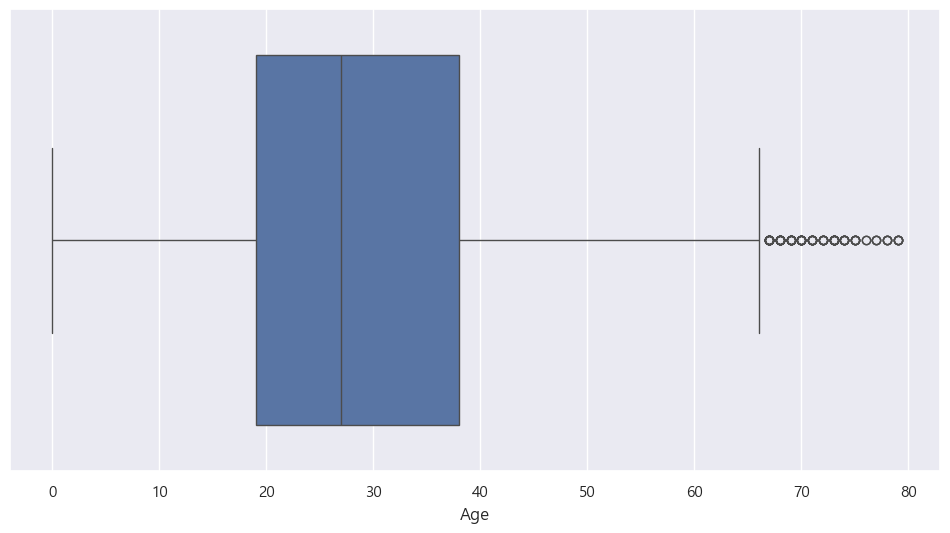

In [21]:
# 연속성을 가진 수치형 데이터이기 때문에 극단치 존재 여부를 확인해본다.
sns.boxplot(data=all_df, x='Age')
plt.show()

In [22]:
# 극단치가 존재하므로 평균과 중앙값을 비교해본다.
a1 = all_df['Age'].mean()
a2 = all_df['Age'].median()
print(a1, a2)

28.771968503937007 27.0


In [23]:
# 평균과 중앙값이 비슷하기 때문에 평균을 사용한다.
# 결측치 개수 확인
all_df['Age'].isna().sum()

270

In [24]:
# 평균으로 채워준다.
idx = all_df.query('Age.isna()').index
all_df.loc[idx, 'Age'] = all_df['Age'].mean()
all_df['Age'].isna().sum()

0

In [25]:
# VIP 의 도수 확인
all_df['VIP'].value_counts()

VIP
False    12401
True       273
Name: count, dtype: int64

In [26]:
# 결측치 개수 확인
all_df['VIP'].isna().sum()

296

In [27]:
# False가 압도적으로 많기 때문에 False로 채워준다
idx = all_df.query('VIP.isna()').index
all_df.loc[idx, 'VIP'] = False
all_df['VIP'].isna().sum()

0

In [28]:
all_df['VIP'].value_counts()

VIP
False    12697
True       273
Name: count, dtype: int64

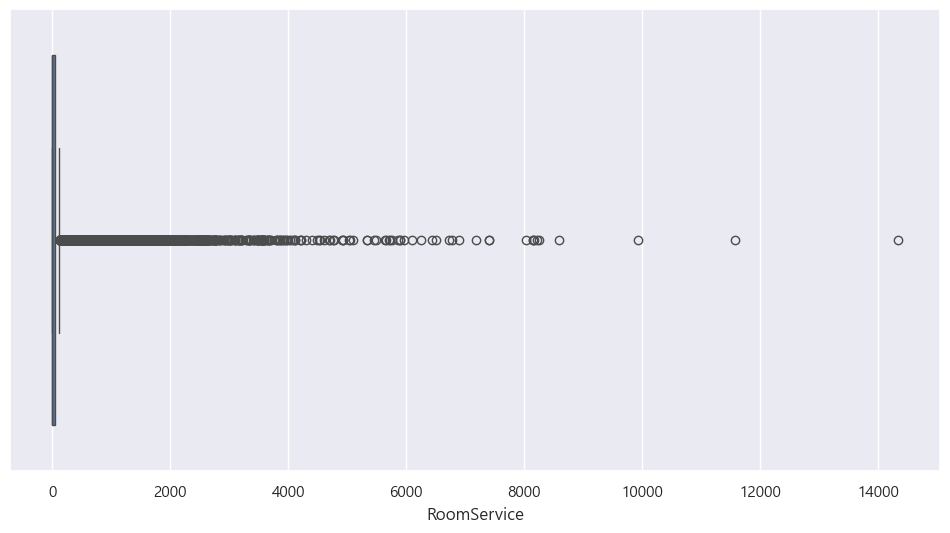

In [29]:
# RoomService
# 연속성을 가진 수치형 데이터이기 때문에 극단치 존재 여부를 확인해본다.
sns.boxplot(data=all_df, x='RoomService')
plt.show()

In [30]:
# 극단치가 존재하므로 평균과 중앙값을 비교해본다.
a1 = all_df['RoomService'].mean()
a2 = all_df['RoomService'].median()
print(a1, a2)

222.89785157787045 0.0


In [31]:
# 평균과 중앙값이 차이가 많이 나기 때문에 중앙값으로 채워준다.
# 결측치 개수 확인
all_df['RoomService'].isna().sum()

263

In [32]:
# 중앙값으로 채워준다.
idx = all_df.query('RoomService.isna()').index
all_df.loc[idx, 'RoomService'] = all_df['RoomService'].median()
all_df['RoomService'].isna().sum()

0

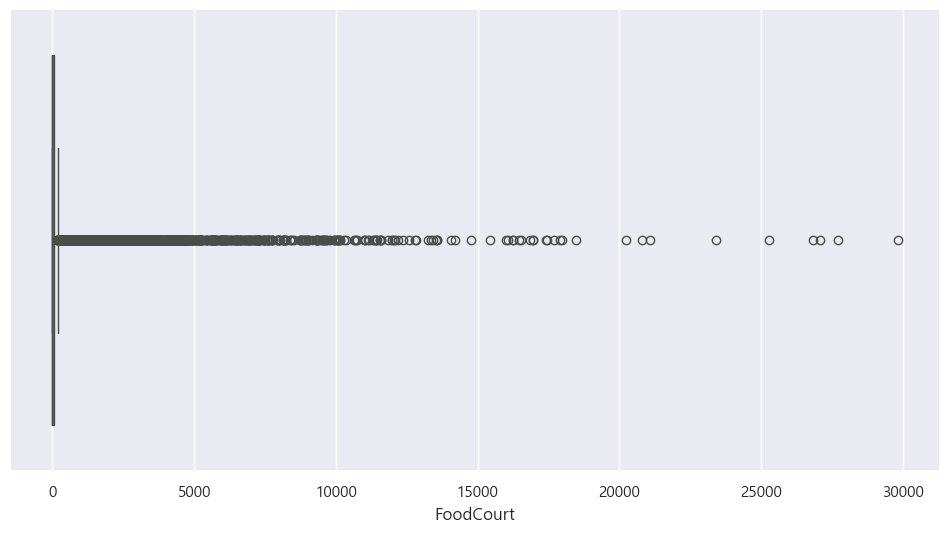

In [33]:
# FoodCourt
# 연속성을 가진 수치형 데이터이기 때문에 극단치 존재 여부를 확인해본다.
sns.boxplot(data=all_df, x='FoodCourt')
plt.show()


In [34]:
# 극단치가 존재하므로 평균과 중앙값을 비교해본다.
a1 = all_df['FoodCourt'].mean()
a2 = all_df['FoodCourt'].median()
print(a1, a2)

451.96167494677076 0.0


In [35]:
# 평균과 중앙값이 차이가 나기 때문에 중앙값을 사용한다.
# 결측치 개수 확인
all_df['FoodCourt'].isna().sum()

289

In [36]:
# 중앙값으로 채워준다.
idx = all_df.query('FoodCourt.isna()').index
all_df.loc[idx, 'FoodCourt'] = all_df['FoodCourt'].median()
all_df['FoodCourt'].isna().sum()

0

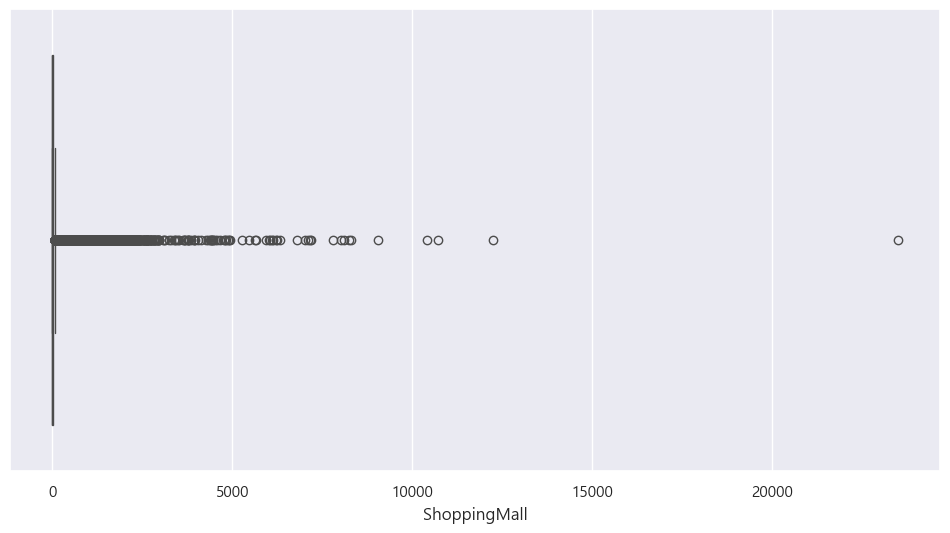

In [37]:
# ShoppingMall
# 연속성을 가진 수치형 데이터이기 때문에 극단치 존재 여부를 확인해본다.
sns.boxplot(data=all_df, x='ShoppingMall')
plt.show()


In [38]:
# 극단치가 존재하므로 평균과 중앙값을 비교해본다.
a1 = all_df['ShoppingMall'].mean()
a2 = all_df['ShoppingMall'].median()
print(a1, a2)

174.90603284902085 0.0


In [39]:
# 평균과 중앙값이 차이가 나기 때문에 중앙값을 사용한다.
# 결측치 개수 확인
all_df['ShoppingMall'].isna().sum()

306

In [40]:
# 중앙값으로 채워준다.
idx = all_df.query('ShoppingMall.isna()').index
all_df.loc[idx, 'ShoppingMall'] = all_df['ShoppingMall'].median()
all_df['ShoppingMall'].isna().sum()

0

In [41]:
# Spa와 VRDeck도 동일하기 때문에 똑같이 처리해준다.
idx = all_df.query('Spa.isna()').index
all_df.loc[idx, 'Spa'] = all_df['Spa'].median()

idx = all_df.query('VRDeck.isna()').index
all_df.loc[idx, 'VRDeck'] = all_df['VRDeck'].median()

display(all_df['Spa'].isna().sum())
display(all_df['VRDeck'].isna().sum())

0

0

In [42]:
# CabinDeck 의 도수 확인
all_df['CabinDeck'].value_counts()

CabinDeck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [43]:
# 결측치 개수 확인
all_df['CabinDeck'].isna().sum()

299

In [44]:
# F가 많기 때문에 F로 채워준다
idx = all_df.query('CabinDeck.isna()').index
all_df.loc[idx, 'CabinDeck'] = 'F'
all_df['CabinDeck'].isna().sum()

0

In [45]:
all_df['CabinDeck'].value_counts()

CabinDeck
F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [46]:
# CabinSide 의 도수 확인
all_df['CabinSide'].value_counts()

CabinSide
S    6381
P    6290
Name: count, dtype: int64

In [47]:
# 결측치 개수 확인
all_df['CabinSide'].isna().sum()

299

In [48]:
# S가 많기 때문에 S로 채워준다
idx = all_df.query('CabinSide.isna()').index
all_df.loc[idx, 'CabinSide'] = 'S'
all_df['CabinSide'].isna().sum()

0

In [49]:
all_df['CabinSide'].value_counts()

CabinSide
S    6680
P    6290
Name: count, dtype: int64

In [50]:
# FirstName 의 도수 확인
all_df['FirstName'].value_counts()

FirstName
Buckentry      19
Belley         19
Hinglendez     18
Fowlesterez    18
Casonston      18
               ..
Cabraseed       1
Miste           1
Imotive         1
Gepie           1
Replic          1
Name: count, Length: 2406, dtype: int64

In [51]:
# LastName 의 도수 확인
all_df['LastName'].value_counts()

LastName
Luise     16
Idace     16
Ale       15
Thel      14
Kaye      14
          ..
Smark      1
Mureah     1
Grey       1
Pix        1
Perit      1
Name: count, Length: 2883, dtype: int64

In [52]:
# 여러분과의 투표 결과로 인해 FirstName과 LastName은 제거한다.
# 농담~~~~
# FirstName과 LastName은 범주형 데이터이다.
# 범주형 데이터인 경우 대표값으로 최빈값을 사용한다.
# 허나 값의 종류가 너무 많기 때문에 상대적으로 최빈값의 개수가 굉장히 적다.
# 그리고 LastName의 경우 최빈값이 동일한 것이 있다.
# 결측치를 채울 값을 결정하기가 어려운 상황이다.
# 이럴때는 제거한다.
# 향후 학습 결과가 좋지 않으면 추가하여 시도해 볼 수는 있다.
all_df.drop(['FirstName', 'LastName'], axis=1, inplace=True)
all_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,NumberInGroup,CabinDeck,CabinSide,GroupNumberCount,NumberInGroupCount,FirstNameCount,LastNameCount
0,Europa,False,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,0.0,1,1,B,P,1,9280,3,5
1,Earth,False,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,1.0,2,1,F,S,1,9280,4,6
2,Europa,False,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,0.0,3,1,A,S,2,9280,7,1
3,Europa,False,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,0.0,3,2,A,S,2,2135,7,5
4,Earth,False,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,1.0,4,1,F,S,1,9280,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,NaN,9266,2,G,S,2,2135,10,6
12966,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,NaN,9269,1,F,S,1,9280,6,5
12967,Mars,True,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,NaN,9271,1,D,P,1,9280,4,6
12968,Europa,False,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,NaN,9273,1,D,P,1,9280,7,3


In [53]:
# 최종 결측치 확인
all_df.isna().sum()

HomePlanet               0
CryoSleep                0
Destination              0
Age                      0
VIP                      0
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
Transported           4277
GroupNumber              0
NumberInGroup            0
CabinDeck                0
CabinSide                0
GroupNumberCount         0
NumberInGroupCount       0
FirstNameCount           0
LastNameCount            0
dtype: int64

### 데이터 저장

In [54]:
train_temp = all_df.query('Transported.notna()')
train_temp.reset_index(inplace=True, drop=True)

test_temp = all_df.query('Transported.isna()')
test_temp.drop('Transported', axis=1, inplace=True)
test_temp.reset_index(inplace=True, drop=True)

train_temp.to_csv('data/spaceship_train4.csv', index=False)
test_temp.to_csv('data/spaceship_test4.csv', index=False)